In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.datasets import fetch_openml

In [3]:
# Load the Diabetes dataset
diabetes = fetch_openml(name="diabetes", version=1, as_frame=True)
df = diabetes.frame

In [4]:
# Separate features and target variable
X = df.drop(columns=["class"])
y = df["class"].apply(lambda x: 1 if x == 'tested_positive' else 0)  # Convert to binary labels

In [5]:
# Preprocess the data (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
# Train logistic regression model
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [9]:
#Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [10]:
# Evaluate performance
cm = confusion_matrix(y_test, y_pred)
precision = cm[1,1] / (cm[1,1] + cm[0,1])  # Precision = TP / (TP + FP)
recall = cm[1,1] / (cm[1,1] + cm[1,0])    # Recall (Sensitivity) = TP / (TP + FN)
specificity = cm[0,0] / (cm[0,0] + cm[0,1])  # Specificity = TN / (TN + FP)

In [11]:
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Precision: {precision:.2f}, Recall (Sensitivity): {recall:.2f}, Specificity: {specificity:.2f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Precision: 0.65, Recall (Sensitivity): 0.67, Specificity: 0.80


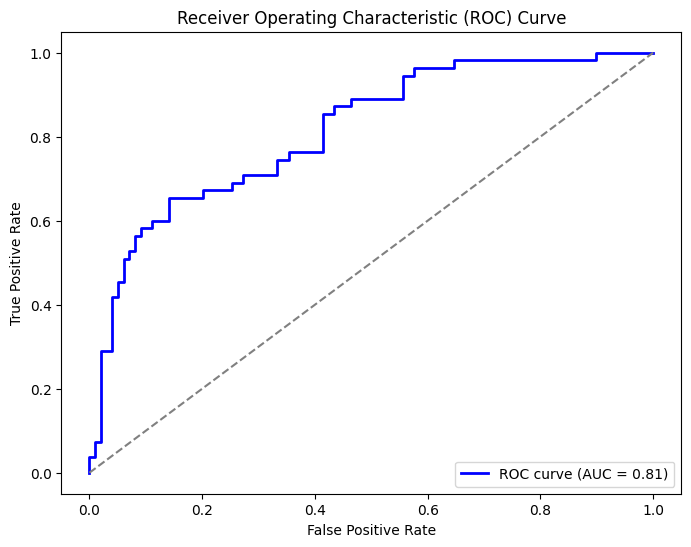

In [12]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
